In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv('covid_impact_on_airport_traffic.csv')
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [7]:
# 7247 rows, 11 columns
df.shape

(7247, 11)

In [8]:
# columns' name
df.columns

Index(['AggregationMethod', 'Date', 'Version', 'AirportName',
       'PercentOfBaseline', 'Centroid', 'City', 'State', 'ISO_3166_2',
       'Country', 'Geography'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


## How many countries are included?

In [13]:
print(df['Country'].unique())
print('There are {} countries are included.'.format(len(df['Country'].unique())))

['Australia' 'Chile' 'Canada' 'United States of America (the)']
There are 4 countries are included.


# How many Airports are included?

In [14]:
print(df['AirportName'].unique())
print('There are {} Airports are included.'.format(len(df['AirportName'].unique())))

['Kingsford Smith' 'Santiago International Airport'
 'Calgary International' 'Edmonton International'
 'Vancouver International' 'Winnipeg International'
 'Halifax International' 'Toronto Pearson' 'Hamilton International'
 'Montreal Mirabel' 'Montreal Trudeau' 'Los Angeles International'
 'San Francisco International' 'Denver International'
 'Miami International ' 'Hartsfield-Jackson Atlanta International '
 'Daniel K. Inouye International ' 'Chicago OHare International'
 'Boston Logan International ' 'Detroit Metropolitan Wayne County '
 'Charlotte Douglas International' 'Newark Liberty International '
 'McCarran International' 'LaGuardia' 'John F. Kennedy International'
 'Dallas/Fort Worth International ' 'Washington Dulles International '
 'Seattle-Tacoma International ']
There are 28 Airports are included.


<h5 align="center"> A quick side note, The column Percent Of Baseline means how much traffic in this airport everyday </h5>	

# What is the situation like in different Airport?

In [24]:
# Convert Date column into time-series data in pandas
df.Date = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   AggregationMethod  7247 non-null   object        
 1   Date               7247 non-null   datetime64[ns]
 2   Version            7247 non-null   float64       
 3   AirportName        7247 non-null   object        
 4   PercentOfBaseline  7247 non-null   int64         
 5   Centroid           7247 non-null   object        
 6   City               7247 non-null   object        
 7   State              7247 non-null   object        
 8   ISO_3166_2         7247 non-null   object        
 9   Country            7247 non-null   object        
 10  Geography          7247 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 622.9+ KB


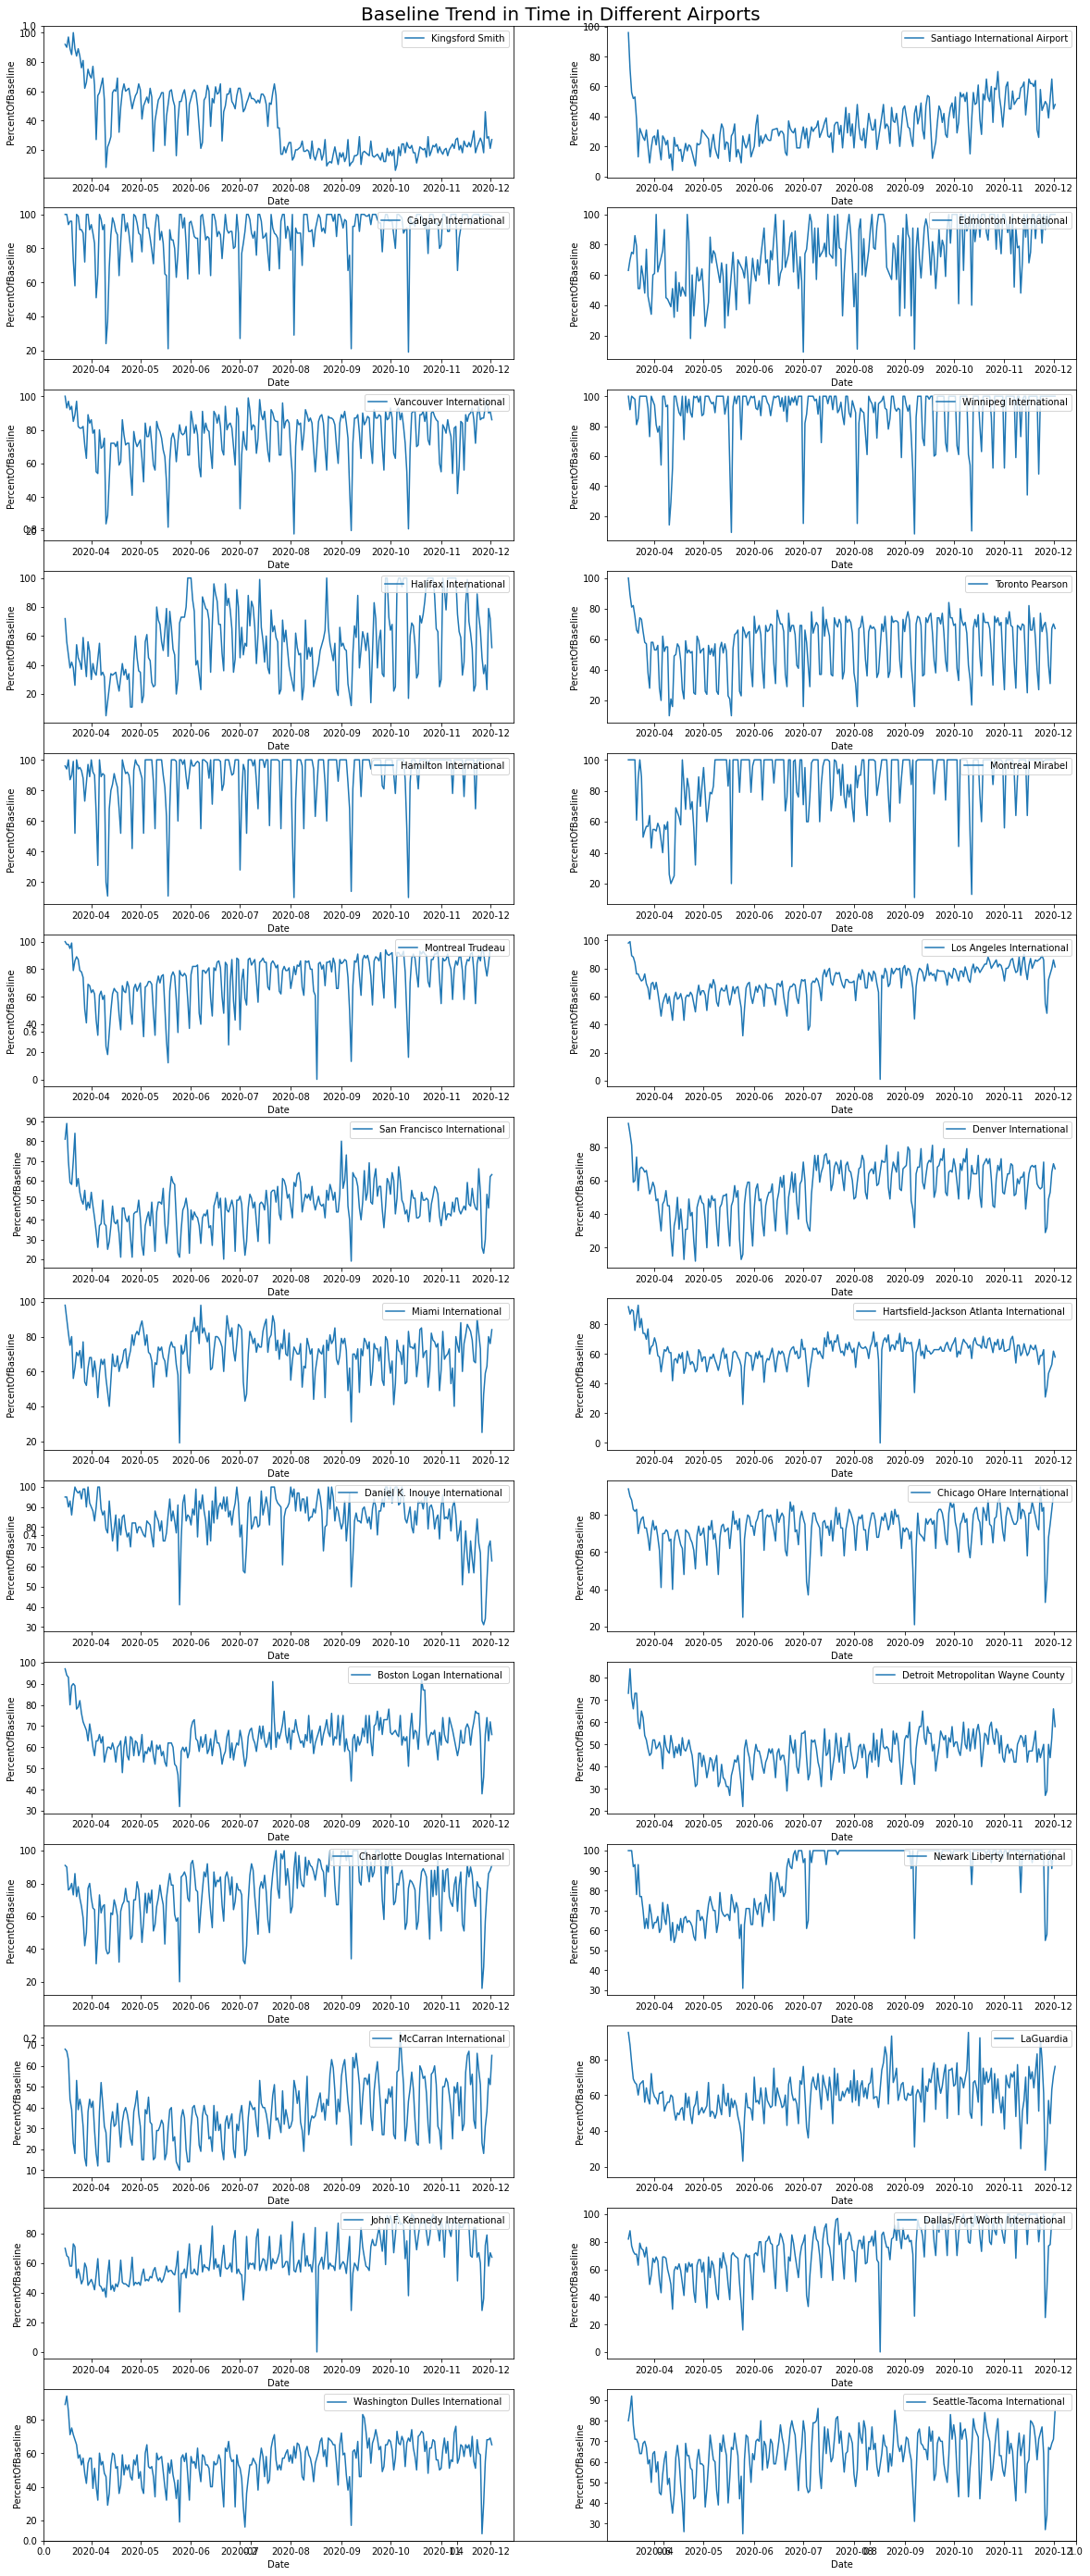

In [116]:
airports = df['AirportName'].unique() # The index of the airports
fig = plt.figure(figsize=(20, 50))
plt.title('Baseline Trend in Time in Different Airports', fontsize=20)
n = 1
for airport in airports:
    ax = fig.add_subplot(14, 2, n)
    data = df[df['AirportName'] == airport][['Date', 'PercentOfBaseline']]
    data = data.groupby(by='Date').sum()
    ax.plot(data)
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('PercentOfBaseline', fontsize=10)
    ax.legend([airport], loc='upper right')
    n=n+1

plt.show()
    

# What is the situation like in different Country?

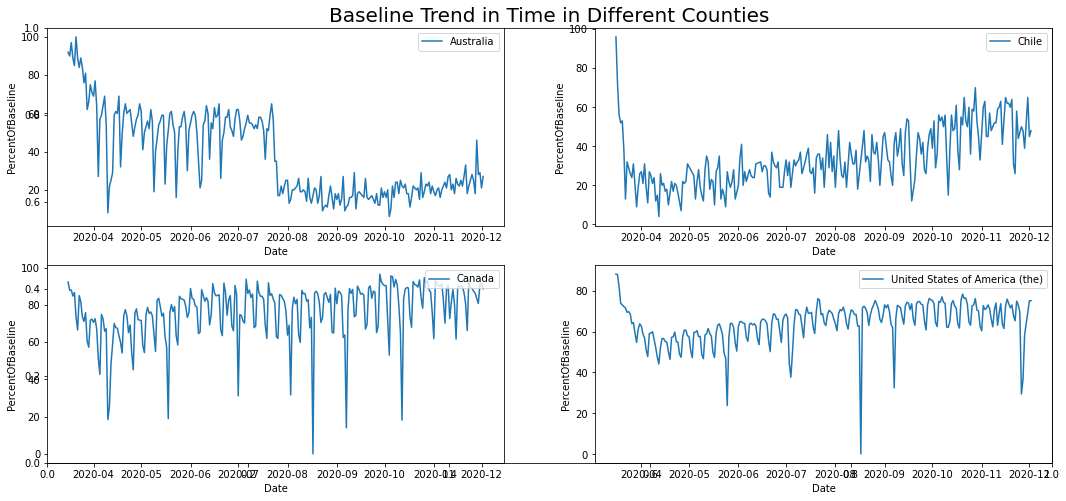

In [124]:
countries = df['Country'].unique()
fig = plt.figure(figsize=(18, 8))
plt.title('Baseline Trend in Time in Different Counties', fontsize=20)
n = 1
for country in countries:
    ax = fig.add_subplot(2, 2, n)
    data = df[df['Country'] == country][['Date', 'PercentOfBaseline']]
    data = data.groupby(by='Date').mean()
    ax.plot(data)
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('PercentOfBaseline', fontsize=10)
    ax.legend([country], loc='upper right')
    n=n+1
    
plt.show()